<a href="https://colab.research.google.com/github/Faiznb/Tugas-PengolahanCitraDigital/blob/main/PengolahanCitra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

In [2]:
# Fungsi untuk membaca dan menampilkan gambar yang diunggah
def read_and_display_image():
    uploaded = files.upload()
    img_path = list(uploaded.keys())[0]

    img = Image.open(img_path)

    plt.imshow(img)
    plt.title("Gambar Original")
    plt.axis('off')
    plt.show()

    return img

Saving 13321772_120770855010122_6907512951128432811_n.jpg to 13321772_120770855010122_6907512951128432811_n.jpg


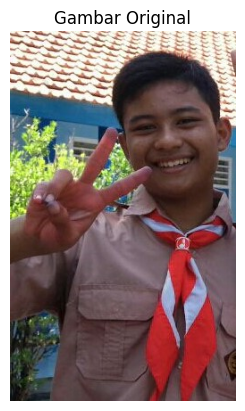

In [3]:
original_color_image = read_and_display_image()

In [25]:
# Fungsi untuk histogram
def plot_color_histogram(img, title):
    if len(img.shape) == 2:
        plt.hist(img.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
        plt.title(title)
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
    else:
        colors = ('red', 'green', 'blue')
        for i, color in enumerate(colors):
            plt.hist(img[:, :, i].ravel(), bins=256, range=(0, 256), color=color, alpha=0.7)
        plt.title(title)
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
    plt.show()

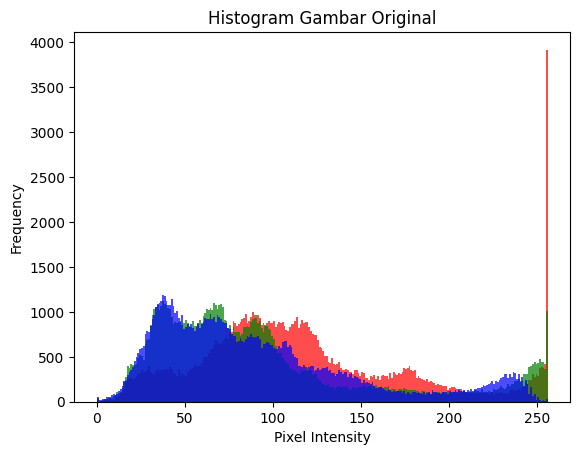

In [26]:
plot_color_histogram(np.array(original_color_image), "Histogram Gambar Original")

In [27]:
def to_grayscale(image):
    return np.array(Image.fromarray(image).convert('L'))

In [29]:
# Konversi gambar ke grayscale
gray_img = to_grayscale(np.array(original_color_image))

In [8]:
# Convolution function
def convolve(image, kernel):
    # mendapatkan dimensi gambar dan kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Siapkan gambar keluaran dengan bentuk yang sama dengan masukan
    output = np.zeros_like(image)

    # Padukan batas gambar untuk menangani bagian tepinya
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    # Perform convolution
    for y in range(image_height):
        for x in range(image_width):
            region = padded_image[y:y + kernel_height, x:x + kernel_width]

            output[y, x] = np.sum(region * kernel)

    output = np.clip(output, 0, 255)

    return output


In [30]:
# Gaussian blur function
def gaussian_blur(image, kernel_size=3):
    gaussian_kernel = np.array([[1, 2, 1],
                                [2, 4, 2],
                                [1, 2, 1]]) / 16  # Gaussian kernel 3x3
    return convolve(image, gaussian_kernel)

# Apply Gaussian Blur
blurred_img = gaussian_blur(gray_img)

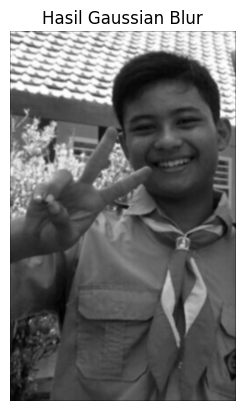

In [32]:
# Display result
plt.imshow(blurred_img, cmap='gray')
plt.title("Hasil Gaussian Blur")
plt.axis('off')
plt.show()

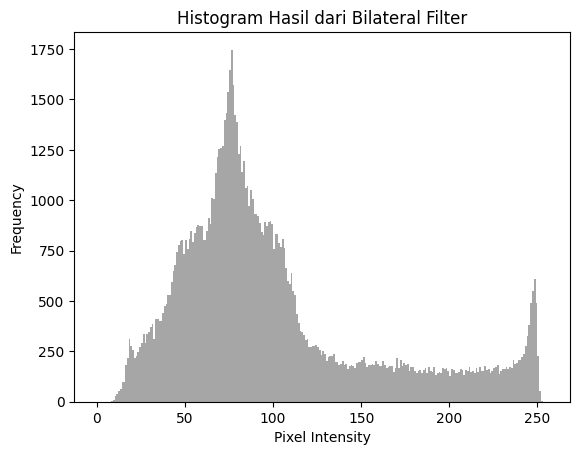

In [33]:
plot_color_histogram(blurred_img, "Histogram Hasil dari Bilateral Filter")

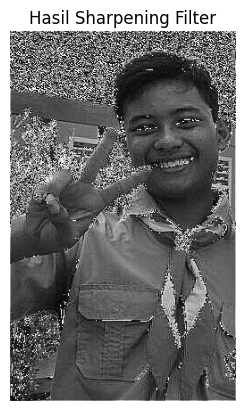

In [12]:
# Sharpening function using high-pass filter
def sharpening_filter(image):
    sharpen_kernel = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])
    return convolve(image, sharpen_kernel)

sharpened_img = sharpening_filter(gray_img)

plt.imshow(sharpened_img, cmap='gray')
plt.title("Hasil Sharpening Filter")
plt.axis('off')
plt.show()

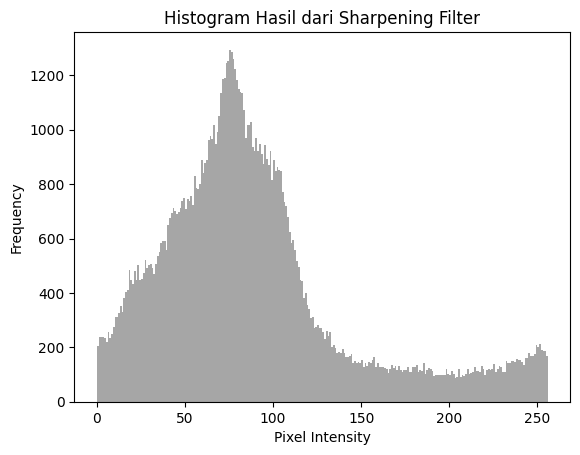

In [13]:
plot_color_histogram(sharpened_img, "Histogram Hasil dari Sharpening Filter")

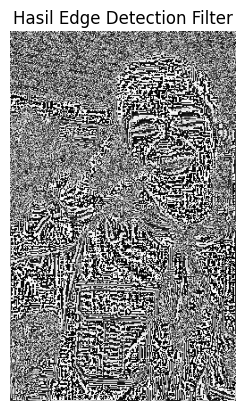

In [14]:
# Edge Detection kernel
def edge_detection_filter(image):
    edge_kernel = np.array([[-1, -1, -1],
                            [-1,  8, -1],
                            [-1, -1, -1]])
    return convolve(image, edge_kernel)

edge_img = edge_detection_filter(gray_img)

plt.imshow(edge_img, cmap='gray')
plt.title("Hasil Edge Detection Filter")
plt.axis('off')
plt.show()

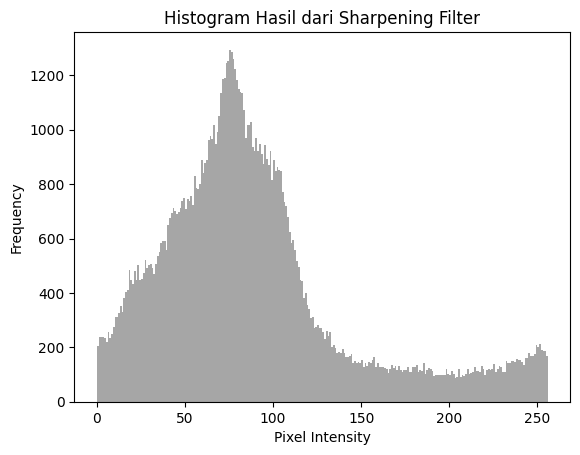

In [15]:
plot_color_histogram(sharpened_img, "Histogram Hasil dari Sharpening Filter")

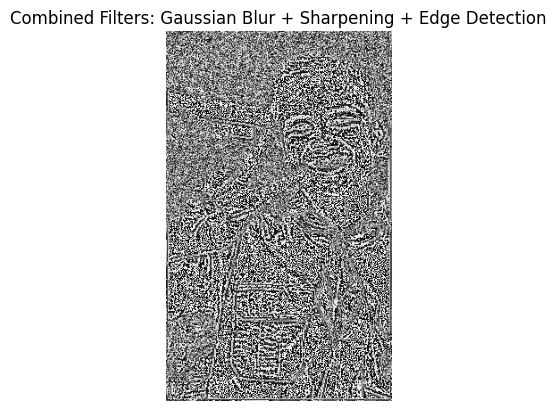

In [35]:
# Combination of filters: Bilateral + Sharpening + Edge Detection
combined_img = edge_detection_filter(sharpening_filter(gaussian_blur(gray_img)))

plt.imshow(combined_img, cmap='gray')
plt.title("Combined Filters: Gaussian Blur + Sharpening + Edge Detection")
plt.axis('off')
plt.show()

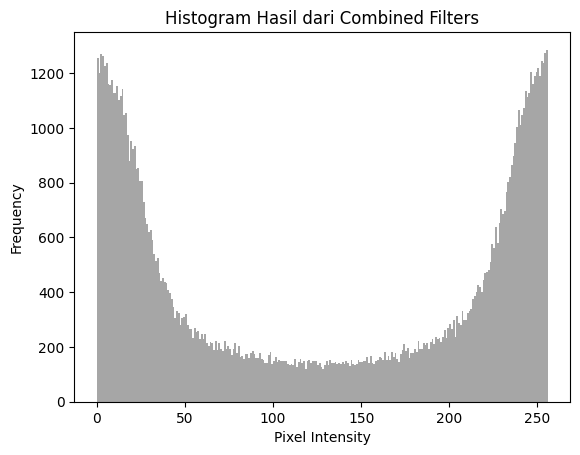

In [36]:
plot_color_histogram(combined_img, "Histogram Hasil dari Combined Filters")

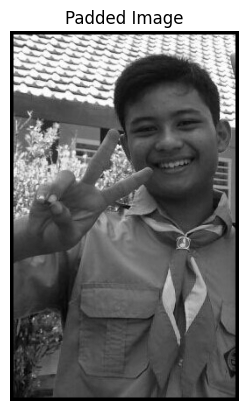

In [18]:
# Tambahkan padding ke gambar
def apply_padding(image, padding_size=4):
    padded_image = np.pad(image, ((padding_size, padding_size), (padding_size, padding_size)), mode='constant', constant_values=0)
    return padded_image

# Penerapan Padding
padded_image = apply_padding(gray_img, padding_size=4)

# Tampilkan gambar yang sudah diberi padding
plt.imshow(padded_image, cmap='gray')
plt.title("Padded Image")
plt.axis('off')
plt.show()



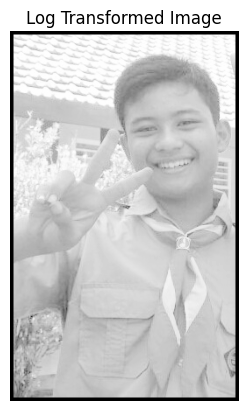

In [40]:
# Log Transformation
def log_transform_raw(image):
    max_pixel = max([max(row) for row in image])
    c = 255 / (np.log(1 + max_pixel))  # Skala konstanta c

    log_image = []

    # Melakukan iterasi pada setiap piksel dalam baris row dari gambar asli.
    for row in image:
        new_row = []
        for pixel in row:
            new_pixel = c * np.log(1 + pixel)  # Formula log
            new_row.append(int(new_pixel))
        log_image.append(new_row)

    return np.array(log_image, dtype=np.uint8)

# Penerapan Log Transformation pada gambar yang telah diberi padding
log_transformed_image = log_transform_raw(padded_image)

# Tampilkan hasil log transform
plt.imshow(log_transformed_image, cmap='gray')
plt.title("Log Transformed Image")
plt.axis('off')
plt.show()


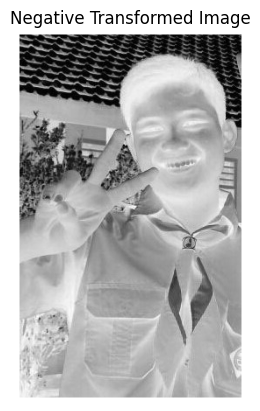

In [41]:
# Negative Transformation
def negative_transform_raw(image):
    negative_image = []
    # Melakukan iterasi pada setiap piksel dalam baris row dari gambar asli.
    for row in image:
        new_row = []
        for pixel in row:
            new_pixel = 255 - pixel  # Formula inversi pixel
            new_row.append(new_pixel)
        negative_image.append(new_row)

    return np.array(negative_image, dtype=np.uint8)

# Penerapan Negative Transformation pada gambar yang telah diberi padding
negative_image = negative_transform_raw(padded_image)

# Tampilkan hasil negative transform
plt.imshow(negative_image, cmap='gray')
plt.title("Negative Transformed Image")
plt.axis('off')
plt.show()

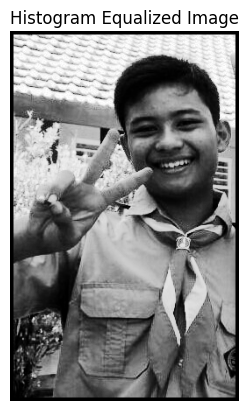

In [42]:
# Histogram Equalization
def histogram_equalization(image):
    # Hitung histogram gambar
    histogram, bins = np.histogram(image.flatten(), 256, [0, 256])

    # Hitung cumulative distribution function (CDF)
    cdf = histogram.cumsum()

    cdf_normalized = cdf * histogram.max() / cdf.max()  # Normalisasi CDF

    # CDF yang bernilai 0 dihilangkan / di mask
    cdf_m = np.ma.masked_equal(cdf, 0)

    #Normalisasi CDF yang Tersisa
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')  # Gantikan nilai yang di-mask dengan 0

    equalized_image = cdf[image]

    return equalized_image

# Penerapan Histogram Equalization pada gambar yang telah diberi padding
equalized_image = histogram_equalization(padded_image)

# Tampilkan hasil histogram equalization
plt.imshow(equalized_image, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis('off')
plt.show()